In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import shutil
from sklearn.model_selection import train_test_split
from google.colab import drive
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plotter


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
2

PATH = '/content/drive/My Drive/competition_data'

files = [i for i in glob.glob(os.path.join(PATH, "*/*.jpg"))]
np.random.shuffle(files)
labels = [os.path.basename(os.path.dirname(i)) for i in files]

data = list(zip(files, labels))
dataframe = pd.DataFrame(data, columns=["Image", "Label"])

print(dataframe)


                                                  Image             Label
0     /content/drive/My Drive/competition_data/pitui...   pituitary_tumor
1     /content/drive/My Drive/competition_data/gliom...      glioma_tumor
2     /content/drive/My Drive/competition_data/menin...  meningioma_tumor
3     /content/drive/My Drive/competition_data/gliom...      glioma_tumor
4     /content/drive/My Drive/competition_data/menin...  meningioma_tumor
...                                                 ...               ...
2470  /content/drive/My Drive/competition_data/menin...  meningioma_tumor
2471  /content/drive/My Drive/competition_data/gliom...      glioma_tumor
2472  /content/drive/My Drive/competition_data/menin...  meningioma_tumor
2473  /content/drive/My Drive/competition_data/pitui...   pituitary_tumor
2474  /content/drive/My Drive/competition_data/gliom...      glioma_tumor

[2475 rows x 2 columns]


glioma_tumor


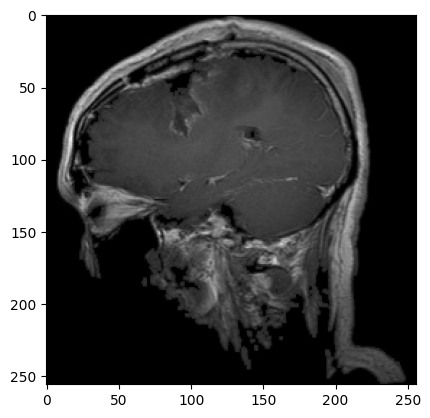

In [ ]:
print(dataframe["Label"].iloc[0])
array = plotter.imread(dataframe["Image"].iloc[0])
plotter.imshow(array)

In [ ]:
#Loading  data without agumentation
import os
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

train_data_dir = PATH

#TRAINING_DIR = '/content/drive/My Drive/organized_competition_data/train'
#VALIDATION_DIR = '/content/drive/My Drive/organized_competition_data/validation'


batch_size = 32
target_size = (224, 224)
validation_split = 0.2

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
    label_mode='categorical'
)
print(train_dataset)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=44,
    image_size=target_size,
    batch_size=batch_size,
    label_mode='categorical'
)



Found 2475 files belonging to 4 classes.
Using 1980 files for training.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>
Found 2475 files belonging to 4 classes.
Using 495 files for validation.


In [ ]:
#Loading  data with agumentation

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

train_data_dir =  PATH
#validation_data_dir = '/content/drive/My Drive/organized_competition_data/validation'


batch_size = 32
target_size = (224, 224)
validation_split = 0.2

data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),

], name='data_augmentation')

# Load the training and validation datasets with tf.data
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=123,
    image_size=target_size,
    batch_size=batch_size,
    label_mode='categorical'
).map(lambda x, y: (data_augmentation(x, training=True), y))

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir ,
    validation_split=validation_split,
    subset="validation",
    seed=123,
    image_size=target_size,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 2475 files belonging to 4 classes.
Using 1980 files for training.
Found 2475 files belonging to 4 classes.
Using 495 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


NUM_CLASSES = 4
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

model = Sequential([

    base_model,
    GlobalAveragePooling2D(),
    Dense(NUM_CLASSES, activation='softmax')
])


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 30

history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset
)


16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/30
62/62 [==============================] - 376s 5s/step - loss: 1.0674 - accuracy: 0.5470 - val_loss: 0.8952 - val_accuracy: 0.6505
Epoch 2/30
62/62 [==============================] - 30s 483ms/step - loss: 0.7903 - accuracy: 0.7035 - val_loss: 0.7499 - val_accuracy: 0.7152
Epoch 3/30
62/62 [==============================] - 31s 493ms/step - loss: 0.7002 - accuracy: 0.7308 - val_loss: 0.6668 - val_accuracy: 0.7394
Epoch 4/30
62/62 [==============================] - 30s 484ms/step - loss: 0.6333 - accuracy: 0.7626 - val_loss: 0.6946 - val_accuracy: 0.7111
Epoch 5/30
62/62 [==============================] - 31s 479ms/step - loss: 0.6139 - accuracy: 0.7753 - val_loss: 0.6828 - val_accuracy: 0.7232
Epoch 6/30
62/62 [==============================] - 30s 484ms/step - loss: 0.5736 - accuracy: 0.7838 - val_loss: 0.6683 - val_accuracy: 0.7394
Epoch 7/30
62/62 [==============================] - 30s 477ms/step - loss: 0.54

In [ ]:
model.save('/content/drive/My Drive/my_saved_model6.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


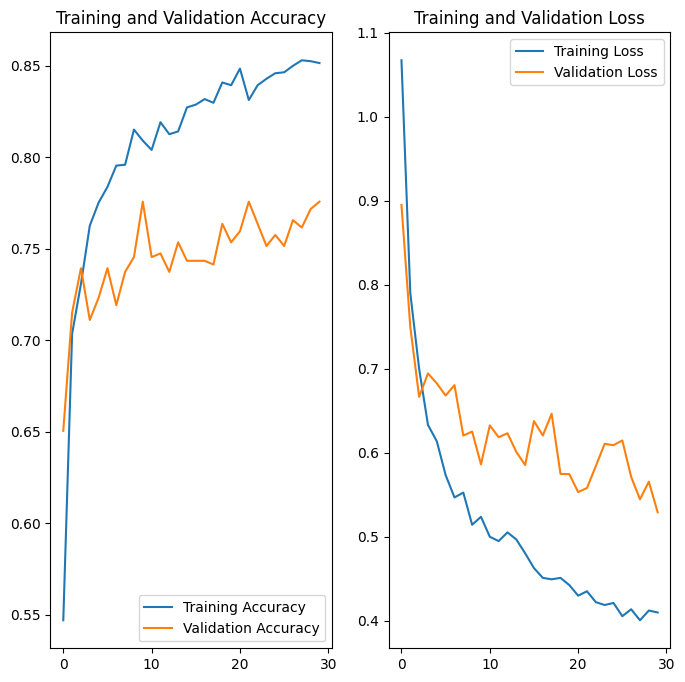

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
FINE_TUNE_EPOCHS = 40
base_model.trainable = True

fine_tune_at = 100

base_model.trainable = True
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
for layer in base_model.layers:
    print(layer.name, layer.output.shape, layer.trainable)


input_1 (None, 224, 224, 3) False
rescaling (None, 224, 224, 3) False
normalization (None, 224, 224, 3) False
rescaling_1 (None, 224, 224, 3) False
stem_conv_pad (None, 225, 225, 3) False
stem_conv (None, 112, 112, 32) False
stem_bn (None, 112, 112, 32) False
stem_activation (None, 112, 112, 32) False
block1a_dwconv (None, 112, 112, 32) False
block1a_bn (None, 112, 112, 32) False
block1a_activation (None, 112, 112, 32) False
block1a_se_squeeze (None, 32) False
block1a_se_reshape (None, 1, 1, 32) False
block1a_se_reduce (None, 1, 1, 8) False
block1a_se_expand (None, 1, 1, 32) False
block1a_se_excite (None, 112, 112, 32) False
block1a_project_conv (None, 112, 112, 16) False
block1a_project_bn (None, 112, 112, 16) False
block2a_expand_conv (None, 112, 112, 96) False
block2a_expand_bn (None, 112, 112, 96) False
block2a_expand_activation (None, 112, 112, 96) False
block2a_dwconv_pad (None, 113, 113, 96) False
block2a_dwconv (None, 56, 56, 96) False
block2a_bn (None, 56, 56, 96) False
block2

In [ ]:
#fine-tuning the Model

FINE_TUNE_EPOCHS = 60
base_model.trainable = True


fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history_fine = model.fit(
    train_dataset,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=validation_dataset
)

Epoch 1/60
62/62 [==============================] - 58s 517ms/step - loss: 0.7852 - accuracy: 0.6869 - val_loss: 0.5164 - val_accuracy: 0.7919
Epoch 2/60
62/62 [==============================] - 31s 497ms/step - loss: 0.6846 - accuracy: 0.7379 - val_loss: 0.5648 - val_accuracy: 0.7737
Epoch 3/60
62/62 [==============================] - 32s 499ms/step - loss: 0.6116 - accuracy: 0.7631 - val_loss: 0.6233 - val_accuracy: 0.7596
Epoch 4/60
62/62 [==============================] - 32s 509ms/step - loss: 0.5725 - accuracy: 0.7838 - val_loss: 0.6360 - val_accuracy: 0.7576
Epoch 5/60
62/62 [==============================] - 31s 500ms/step - loss: 0.5454 - accuracy: 0.7955 - val_loss: 0.6462 - val_accuracy: 0.7596
Epoch 6/60
62/62 [==============================] - 31s 490ms/step - loss: 0.5138 - accuracy: 0.8051 - val_loss: 0.6390 - val_accuracy: 0.7657
Epoch 7/60
62/62 [==============================] - 32s 505ms/step - loss: 0.4766 - accuracy: 0.8212 - val_loss: 0.6210 - val_accuracy: 0.7838

In [ ]:
score, acc = model.evaluate(validation_dataset)
print('Test Loss =', score)
print('Test Accuracy =', acc)

16/16 [==============================] - 2s 69ms/step - loss: 0.0367 - accuracy: 0.9879
Test Loss = 0.03670983016490936
Test Accuracy = 0.9878787994384766


In [36]:


from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/my_model4.h5')



In [ ]:
# additional epochs

FINE_TUNE_EPOCHS1 = 40

total_epochs = 60 + FINE_TUNE_EPOCHS1


history_fine_additional = model.fit(
    train_dataset,
    epochs=total_epochs,
    initial_epoch=60,
    validation_data=validation_dataset
)

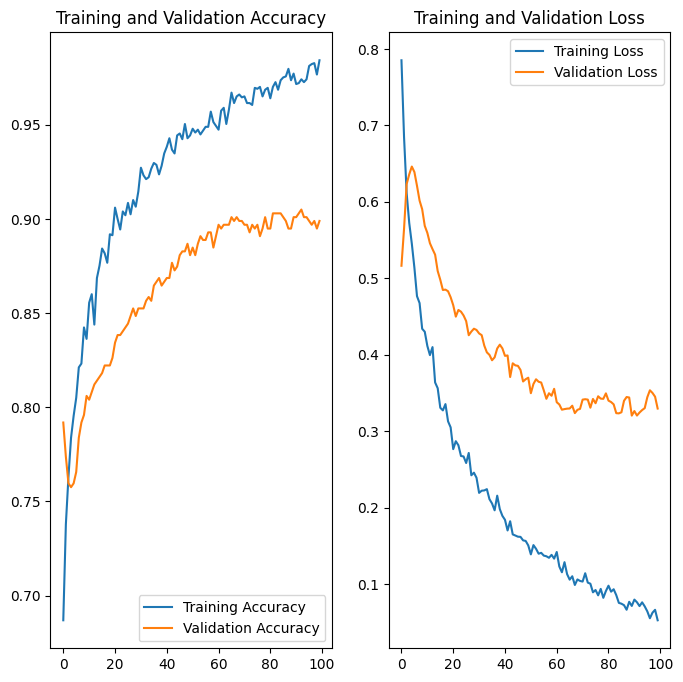

In [ ]:

acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']


acc += history_fine_additional.history['accuracy']
val_acc += history_fine_additional.history['val_accuracy']
loss += history_fine_additional.history['loss']
val_loss += history_fine_additional.history['val_loss']

total_epochs = range(100)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(total_epochs, acc, label='Training Accuracy')
plt.plot(total_epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(total_epochs, loss, label='Training Loss')
plt.plot(total_epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [16]:
# additional epochs

FINE_TUNE_EPOCHS4 = 40

total_epochs4 = 100 + FINE_TUNE_EPOCHS4


history_fine_additional4 = model.fit(
    train_dataset,
    epochs=total_epochs4,
    initial_epoch=100,
    validation_data=validation_dataset
)


Epoch 101/140
78/78 [==============================] - 65s 506ms/step - loss: 0.1728 - accuracy: 0.9419 - val_loss: 0.1985 - val_accuracy: 0.9257
Epoch 102/140
78/78 [==============================] - 39s 494ms/step - loss: 0.1640 - accuracy: 0.9382 - val_loss: 0.1854 - val_accuracy: 0.9289
Epoch 103/140
78/78 [==============================] - 40s 501ms/step - loss: 0.1620 - accuracy: 0.9394 - val_loss: 0.1815 - val_accuracy: 0.9305
Epoch 104/140
78/78 [==============================] - 40s 507ms/step - loss: 0.1516 - accuracy: 0.9483 - val_loss: 0.1892 - val_accuracy: 0.9225
Epoch 105/140
78/78 [==============================] - 39s 498ms/step - loss: 0.1548 - accuracy: 0.9455 - val_loss: 0.1793 - val_accuracy: 0.9289
Epoch 106/140
78/78 [==============================] - 39s 490ms/step - loss: 0.1394 - accuracy: 0.9540 - val_loss: 0.1788 - val_accuracy: 0.9273
Epoch 107/140
78/78 [==============================] - 40s 502ms/step - loss: 0.1468 - accuracy: 0.9483 - val_loss: 0.1858 -

In [7]:

FINE_TUNE_EPOCHS2 = 20

history_fine_additional2 = model.fit(
    train_dataset,
    epochs=FINE_TUNE_EPOCHS2,


    validation_data=validation_dataset
)

Epoch 1/20
78/78 [==============================] - 470s 5s/step - loss: 0.0928 - accuracy: 0.9665 - val_loss: 0.1771 - val_accuracy: 0.9370
Epoch 2/20
78/78 [==============================] - 377s 5s/step - loss: 0.1025 - accuracy: 0.9673 - val_loss: 0.1637 - val_accuracy: 0.9402
Epoch 3/20
78/78 [==============================] - 373s 5s/step - loss: 0.0811 - accuracy: 0.9734 - val_loss: 0.1717 - val_accuracy: 0.9386
Epoch 4/20
78/78 [==============================] - 375s 5s/step - loss: 0.0872 - accuracy: 0.9734 - val_loss: 0.1710 - val_accuracy: 0.9370
Epoch 5/20
78/78 [==============================] - 375s 5s/step - loss: 0.0890 - accuracy: 0.9693 - val_loss: 0.1756 - val_accuracy: 0.9338
Epoch 6/20
78/78 [==============================] - 386s 5s/step - loss: 0.0897 - accuracy: 0.9705 - val_loss: 0.1710 - val_accuracy: 0.9370
Epoch 7/20
78/78 [==============================] - 383s 5s/step - loss: 0.0811 - accuracy: 0.9717 - val_loss: 0.1760 - val_accuracy: 0.9354
Epoch 8/20
78

In [8]:
model.save('/content/drive/My Drive/my_model6.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

from tensorflow.keras.models import load_model

PATH_test_set = '/content/drive/My Drive/kaggle_solutionSet'


test_datagen = ImageDataGenerator(rescale=1./255)

os.makedirs(os.path.join(PATH_test_set, 'test_images'), exist_ok=True)
for image_file in os.listdir(PATH_test_set):
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        os.rename(
            os.path.join(PATH_test_set, image_file),
            os.path.join(PATH_test_set, 'test_images', image_file)
        )

# Load images
test_generator = test_datagen.flow_from_directory(
    PATH_test_set,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)


predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=-1)

class_names = ['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']
predicted_class_names = [class_names[i] for i in predicted_classes.numpy()]



Found 621 images belonging to 1 classes.
20/20 [==============================] - 5s 136ms/step


In [9]:

PATH_test_set = '/content/drive/My Drive/kaggle_solutionSet/test_images'
print(os.listdir('/content/drive/My Drive/kaggle_solutionSet/test_images'))



image_paths = [os.path.join(PATH_test_set, fname) for fname in os.listdir(PATH_test_set) if fname.endswith('.jpg') or fname.endswith('.png')]
print(f"Collected {len(image_paths)} image paths")


batch_size = 32
target_size = (224, 224)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=PATH_test_set,
    labels=None,
    label_mode=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=target_size,
    shuffle=False,
    seed=None,
)

predictions = model.predict(test_dataset)
print(predictions)

['image_377.jpg', 'image_216.jpg', 'image_388.jpg', 'image_217.jpg', 'image_478.jpg', 'image_449.jpg', 'image_586.jpg', 'image_211.jpg', 'image_407.jpg', 'image_439.jpg', 'image_570.jpg', 'image_392.jpg', 'image_600.jpg', 'image_226.jpg', 'image_27.jpg', 'image_171.jpg', 'image_81.jpg', 'image_47.jpg', 'image_72.jpg', 'image_405.jpg', 'image_179.jpg', 'image_571.jpg', 'image_359.jpg', 'image_51.jpg', 'image_65.jpg', 'image_455.jpg', 'image_523.jpg', 'image_298.jpg', 'image_203.jpg', 'image_330.jpg', 'image_479.jpg', 'image_239.jpg', 'image_525.jpg', 'image_115.jpg', 'image_565.jpg', 'image_338.jpg', 'image_89.jpg', 'image_462.jpg', 'image_363.jpg', 'image_324.jpg', 'image_194.jpg', 'image_63.jpg', 'image_98.jpg', 'image_399.jpg', 'image_411.jpg', 'image_580.jpg', 'image_233.jpg', 'image_436.jpg', 'image_558.jpg', 'image_393.jpg', 'image_442.jpg', 'image_86.jpg', 'image_402.jpg', 'image_177.jpg', 'image_559.jpg', 'image_539.jpg', 'image_576.jpg', 'image_328.jpg', 'image_355.jpg', 'image

In [10]:
import numpy as np

class_names = ['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']
predicted_class_indices = np.argmax(predictions, axis=-1)
predicted_class_labels = [class_names[index] for index in predicted_class_indices]


image_paths = [os.path.join(PATH_test_set, fname) for fname in os.listdir(PATH_test_set) if fname.endswith('.jpg') or fname.endswith('.png')]
print(f"Collected {len(image_paths)} image paths")


predictions_with_filenames = dict(zip(image_paths, predicted_class_labels))
print(f"Number of predictions with filenames: {len(predictions_with_filenames)}")


df_predictions = pd.DataFrame(list(predictions_with_filenames.items()), columns=['ID', 'Class'])
df_predictions['ID'] = df_predictions['ID'].apply(lambda x: x.split('/')[-1])
print(df_predictions)
# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/My Drive/predictions6.csv'
df_predictions.to_csv(csv_file_path, index=False)

print(f"Predictions saved to {csv_file_path}")

Collected 621 image paths
Number of predictions with filenames: 621
                ID             Class
0    image_377.jpg  meningioma_tumor
1    image_216.jpg  meningioma_tumor
2    image_388.jpg  meningioma_tumor
3    image_217.jpg  meningioma_tumor
4    image_478.jpg  meningioma_tumor
..             ...               ...
616  image_283.jpg  meningioma_tumor
617   image_18.jpg  meningioma_tumor
618   image_24.jpg   pituitary_tumor
619  image_607.jpg  meningioma_tumor
620   image_30.jpg  meningioma_tumor

[621 rows x 2 columns]
Predictions saved to /content/drive/My Drive/predictions6.csv
